# 🚀**Rocket Launches Classification Project**

This project aims to **analyze and classify rocket launch missions** based on historical launch data.  
We use data preprocessing, feature engineering, and machine learning models to predict the **status of missions** (Success / Failure / Prelaunch Failure).  

#🔑 Project Steps:
1. **Load & clean the dataset** (remove unnecessary columns, handle missing values).  
2. **Split the data** into training and testing sets.  
3. **Feature engineering** (e.g., extract year, month, day from the launch date).  
4. **Encode categorical variables** (company, location, rocket status).  
5. **Handle class imbalance** using SMOTE.  
6. **Train ML models** such as:
   - Random Forest  
   - XGBoost  
7. **Evaluate models** using accuracy, classification report, and confusion matrix.  

#📊 Expected Output:
- Clean dataset ready for modeling.  
- Balanced training data.  
- Trained models with performance metrics.  
- Insights into which features affect launch success.  


#📦 **Importing Libraries** 

In this step, we import the essential libraries and tools required for the project:  

- **pandas / numpy**: For data manipulation and numerical operations.  
- **seaborn / matplotlib**: For data visualization and exploratory analysis.  
- **scikit-learn (sklearn)**:  
  - `BaseEstimator, TransformerMixin`: To create custom transformers.  
  - `OneHotEncoder, StandardScaler, LabelEncoder`: For encoding and scaling features.  
  - `SimpleImputer`: To handle missing values.  
  - `ColumnTransformer, Pipeline`: To build a data preprocessing pipeline.  
  - `train_test_split, cross_val_score`: For splitting data and model validation.  
  - `accuracy_score, classification_report, confusion_matrix`: For evaluating model performance.  
  - `RandomForestClassifier`: Random Forest algorithm for classification tasks.  
- **SMOTE (from imblearn)**: To handle class imbalance by oversampling the minority class.  
- **XGBClassifier (from XGBoost)**: A powerful gradient boosting classifier.  

> **Purpose of this cell:** Set up the programming environment with the required tools for data preprocessing, modeling, and evaluation.  


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

#📂**Loading and Preparing the Dataset**

In this step, we load the dataset and perform initial preprocessing:  

1. **Load the dataset** from the file path:  
   - `pd.read_csv(file_name)` loads the CSV file into a DataFrame.  

2. **Drop unnecessary columns**:  
   - Columns like `"Unnamed: 0:1"`, `"Unnamed:0"`, and `"Detail"` are removed if they exist.  

3. **Define features and target variable**:  
   - `y = df['Status Mission']`: The target column representing the mission outcome.  
   - `X = [...]`: Selected features (`Company Name`, `Location`, `Datum`, `Status Rocket`).  

4. **Generate a summary table** showing:  
   - Number of rows in the dataset.  
   - Number of columns.  
   - Number of features selected.  
   - Number of unique target classes.  

5. **Preview the data**:  
   - Display the summary table.  
   - Show the first 10 rows of features (`X`).  
   - Display the distribution of the target variable `y`, including counts and percentages.  

> **Purpose of this cell:** Load and clean the dataset, select relevant features, and explore the target variable distribution.  


In [28]:
# Put the file path here
file_name = r""path/to/your/file.csv""

df = pd.read_csv(file_name)
df = df.drop(columns=["Unnamed: 0:1","Unnamed:0","Detail"],errors="ignore")

y = df['Status Mission']            
X = df[["Company Name", "Location", "Datum", "Status Rocket"]] 

summary = pd.DataFrame({
             "Rows":[df.shape[0]],
             "columns":[df.shape[1]],
             "features":[X.shape[1]],
             "Target":[y.nunique()]
})

print("The file has been uploaded",file_name)
display(summary)
display(X.head(10))
display(y.value_counts().to_frame("Number").assign(
    percentage=(y.value_counts(normalize=True)*100).round(2)
))
                            


The file has been uploaded C:\Users\pppsa\OneDrive\سطح المكتب\Data Cleaning Project\rocket_launches_cleand.csv


,Rows,columns,features,Target
0,4324,8,4,4


,Company Name,Location,Datum,Status Rocket
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",StatusActive
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",StatusActive
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",StatusActive
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",StatusActive
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",StatusActive


,Number,percentage
Status Mission,,
Success,3879,89.71
Failure,339,7.84
Partial Failure,102,2.36
Prelaunch Failure,4,0.09


#✂️**Splitting the Dataset and Adjusting Target Labels**  

In this step, we prepare the dataset for training and evaluation:  

1. **Split the dataset** into training and testing sets:  
   - `train_test_split(X, y, test_size=0.2, random_state=42)`  
   - 80% of the data is used for training, 20% for testing.  

2. **Generate a summary table** showing:  
   - The number of rows in train and test sets.  
   - The number of features in each set.  
   - The number of target values.  

3. **Check target distribution**:  
   - Display the percentage of each class in the training set.  
   - Display the percentage of each class in the testing set.  

4. **Merge similar categories**:  
   - Replace `"Prelaunch Failure"` with `"Failure"` to simplify classification.  

5. **Re-check target distribution** after merging categories.  

> **Purpose of this cell:** Ensure a proper train/test split, check class balance in both sets, and simplify the target labels for better model performance.  


In [29]:
X_train , X_test , y_train , y_test = train_test_split(
    X,y, test_size = 0.2 , random_state = 42)

summary = pd.DataFrame({
    
             "Set":["Train","Test"],
             "Rows":[X_train.shape[0], X_test.shape[0]],
             "features":[X_train.shape[1], X_test.shape[1]],
             "Target":[y_train.shape[0], y_test.shape[0]]
})
display(summary)

print("Target distribution in Train set:")
display(y_train.value_counts(normalize=True).round(3)*100)
print("\n"*0)

print("Target distribution in Test set:")
display(y_test.value_counts(normalize=True).round(3)*100)
print("\n"*0)

y_train = y_train.replace("Prelaunch Failure","Failure")
y_test = y_test.replace("Prelaunch Failure","Failure")

print("target distribution after merging:")
display(y_train.value_counts())

,Set,Rows,features,Target
0,Train,3459,4,3459
1,Test,865,4,865


Target distribution in Train set:


Status Mission
Success              89.7
Failure               7.9
Partial Failure       2.4
Prelaunch Failure     0.1
Name: proportion, dtype: float64


Target distribution in Test set:


Status Mission
Success              89.9
Failure               7.7
Partial Failure       2.2
Prelaunch Failure     0.1
Name: proportion, dtype: float64


target distribution after merging:


Status Mission
Success            3101
Failure             275
Partial Failure      83
Name: count, dtype: int64

#🗓**Feature Engineering: Date Transformation** 

In this step, we create a **custom transformer** to handle the `Datum` (date) column:  

1. **Create a custom class `DateTransformer`** that inherits from `BaseEstimator` and `TransformerMixin`.  
   - This allows us to integrate it into a Scikit-learn pipeline later.  

2. **Transformation process**:  
   - Convert the `Datum` column into a proper datetime format.  
   - Extract new time-based features:  
     - `Year`  
     - `Month`  
     - `Day`  
   - Drop the original `Datum` column (since it’s no longer needed).  

3. **Apply the transformer**:  
   - `fit_transform()` on the training set.  
   - `transform()` on the test set.  

4. **Output**:  
   - The dataset now has three new features (`Year`, `Month`, `Day`) instead of the original `Datum` column.  

> **Purpose of this cell:** Enrich the dataset with meaningful date features that can help the model better understand time-related patterns.  


In [30]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, column = "Datum"):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X[self.column] = pd.to_datetime(X[self.column], errors="coerce")
        X["Year"] = X[self.column].dt.year
        X["Month"] = X[self.column].dt.month
        X["Day"] = X[self.column].dt.day

        X = X.drop(columns=[self.column])
        return X

dt = DateTransformer(column="Datum")
X_train_transformed = dt.fit_transform(X_train)
X_test_transformed = dt.transform(X_test)
print("Date transformed. New columns:", X_train_transformed.columns.tolist())

X_train_transformed.head()

Date transformed. New columns: ['Company Name', 'Location', 'Status Rocket', 'Year', 'Month', 'Day']


,Company Name,Location,Status Rocket,Year,Month,Day
3676,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",StatusRetired,1968.0,4.0,18.0
63,CASC,"LC-101, Wenchang Satellite Launch Center, China",StatusActive,2019.0,12.0,27.0
3929,RVSN USSR,"Site 86/1, Kapustin Yar, Russia",StatusRetired,1965.0,11.0,4.0
2034,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",StatusRetired,1986.0,11.0,15.0
1309,VKS RF,"Site 32/1, Plesetsk Cosmodrome, Russia",StatusRetired,1998.0,6.0,15.0


#🔤**Encoding Categorical Variables & Handling Class Imbalance**  

In this step, we process categorical features and balance the dataset:  

1. **Identify categorical columns**:  
   - Extract all columns with type `object`.  

2. **Apply One-Hot Encoding**:  
   - Convert categorical features into numerical form using `pd.get_dummies()`.  
   - Perform this for both training and testing sets.  

3. **Align training and testing sets**:  
   - Ensure both sets have the same columns after encoding.  
   - Fill any missing columns with zeros (`fill_value=0`).  

4. **Handle missing values**:  
   - Use `.fillna(0)` to replace any remaining NaN values.  
   - Print the total number of NaNs to confirm none remain.  

5. **Apply SMOTE (Synthetic Minority Oversampling Technique)**:  
   - Oversample the minority class to handle class imbalance.  
   - `k_neighbors=1` is used for generating synthetic samples.  

6. **Output**:  
   - Display the dataset shapes before and after SMOTE.  
   - Show the class distribution after balancing.  

> **Purpose of this cell:** Convert categorical features into numeric format and ensure balanced class distribution for more reliable model training.  


In [31]:
cat_cols = X_train_transformed.select_dtypes(include="object").columns.tolist()

X_train_encoded = pd.get_dummies(X_train_transformed, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test_transformed, columns=cat_cols)

X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join = "left", axis =1, fill_value = 0)

X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)
print("NaN after fillna:", X_train_encoded.isna().sum().sum())

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

print("befor SMOTE:", X_train_encoded.shape, y_train.shape)
print("after SMOTE:", X_resampled.shape, y_resampled.shape)
print(y_resampled.value_counts())


NaN after fillna: 0
befor SMOTE: (3459, 191) (3459,)
after SMOTE: (9303, 191) (9303,)
Status Mission
Success            3101
Partial Failure    3101
Failure            3101
Name: count, dtype: int64


#🌲**Training and Evaluating Random Forest Classifier**  

In this step, we train and evaluate a **Random Forest model**:  

1. **Initialize RandomForestClassifier**:  
   - `n_estimators=200`: Number of decision trees.  
   - `random_state=42`: Ensures reproducibility.  
   - `class_weight="balanced"`: Adjusts weights to handle class imbalance.  

2. **Train the model**:  
   - `rf.fit(X_resampled, y_resampled)` trains the classifier using the balanced training set.  

3. **Make predictions**:  
   - Use `predict()` on the test set.  

4. **Evaluate performance**:  
   - Print **accuracy score**.  
   - Show the **classification report** with precision, recall, and F1-score.  
   - Plot a **confusion matrix** heatmap to visualize classification performance across classes.  

5. **Output**:  
   - Overall model accuracy.  
   - Detailed classification metrics.  
   - Confusion matrix heatmap.  

> **Purpose of this cell:** Train a Random Forest classifier to predict mission outcomes and evaluate its effectiveness using multiple performance metrics.  


Accuracy (RandomForest): 0.8913294797687862
Classification Report (RandomForest):
                  precision    recall  f1-score   support

        Failure       0.43      0.24      0.30        68
Partial Failure       0.20      0.11      0.14        19
        Success       0.92      0.97      0.94       778

       accuracy                           0.89       865
      macro avg       0.52      0.44      0.46       865
   weighted avg       0.87      0.89      0.88       865



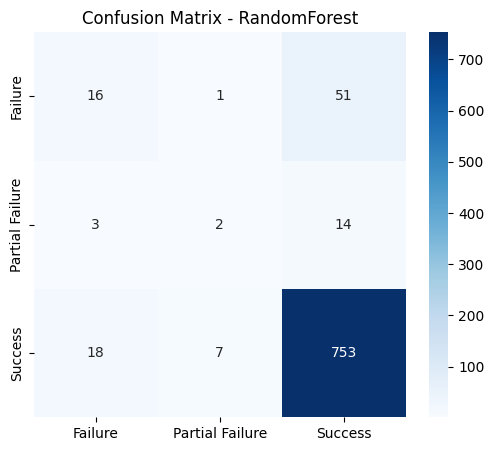

In [54]:
rf= RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced")

rf.fit(X_resampled, y_resampled)

y_pred_rf = rf.predict(X_test_encoded)

print("Accuracy (RandomForest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (RandomForest):\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)
plt.title("Confusion Matrix - RandomForest")
plt.show()


#⚡**Training and Evaluating XGBoost Classifier**  

In this step, we train and evaluate an **XGBoost model**:  

1. **Encode target variable**:  
   - Apply `LabelEncoder` to transform categorical target labels into numerical format.  
   - Encode both the resampled training labels (`y_resampled`) and the test set (`y_test`).  

2. **Initialize XGBoost classifier** with key hyperparameters:  
   - `n_estimators=500`: Number of trees.  
   - `learning_rate=0.05`: Step size shrinkage.  
   - `max_depth=6`: Maximum depth of trees.  
   - `subsample=0.8`: Fraction of samples used for training each tree.  
   - `colsample_bytree=0.8`: Fraction of features used per tree.  
   - `eval_metric="mlogloss"`: Multi-class log loss evaluation metric.  

3. **Train the model** on the resampled training set.  

4. **Make predictions** on the test set.  

5. **Evaluate performance**:  
   - Print **accuracy score**.  
   - Display the **classification report** (precision, recall, F1-score per class).  
   - Plot a **confusion matrix** using Seaborn heatmap to visualize prediction results.  

> **Purpose of this cell:** Train an advanced gradient boosting model (XGBoost) and assess its ability to classify rocket launch outcomes.  


Accuracy (XGBoost): 0.8820809248554913
Classification Report (XGBoost):
                  precision    recall  f1-score   support

        Failure       0.39      0.24      0.29        68
Partial Failure       0.15      0.11      0.12        19
        Success       0.92      0.96      0.94       778

       accuracy                           0.88       865
      macro avg       0.49      0.43      0.45       865
   weighted avg       0.86      0.88      0.87       865



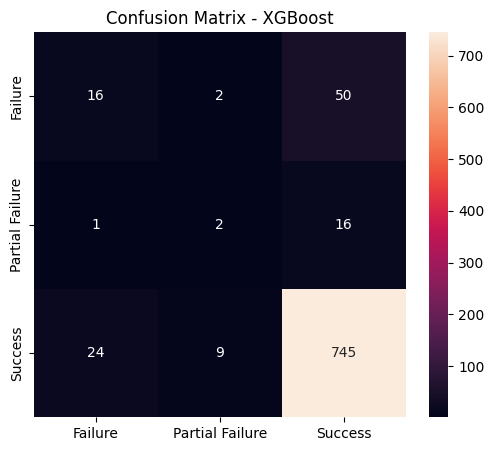

In [53]:
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)

xgb.fit(X_resampled, y_resampled_encoded)
y_pred_xgb = xgb.predict(X_test_encoded)

print("Accuracy (XGBoost):", accuracy_score(y_test_encoded, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(
    y_test_encoded, y_pred_xgb, target_names=le.classes_))


cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt="d", color = "#4b0082",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.show()


#🌟**Feature Importance Analysis (Random Forest**  

In this step, we analyze which features contribute the most to the model’s predictions:  

1. **Extract feature importances**:  
   - `rf.feature_importances_` provides the importance score of each feature in the Random Forest model.  

2. **Sort and select the top 10 features**:  
   - Use `np.argsort(importances)[-10:]` to get the indices of the 10 most important features.  

3. **Plot the results**:  
   - Create a horizontal bar chart (`plt.barh`) showing the importance values of the top 10 features.  
   - Label each bar with the corresponding feature name.  
   - Add a descriptive title: *"Top 10 Feature Importances - RandomForest"*.  

4. **Output**:  
   - A visualization highlighting which features have the strongest impact on predicting rocket launch outcomes.  

> **Purpose of this cell:** Identify and interpret the most influential features that affect the classification results.  


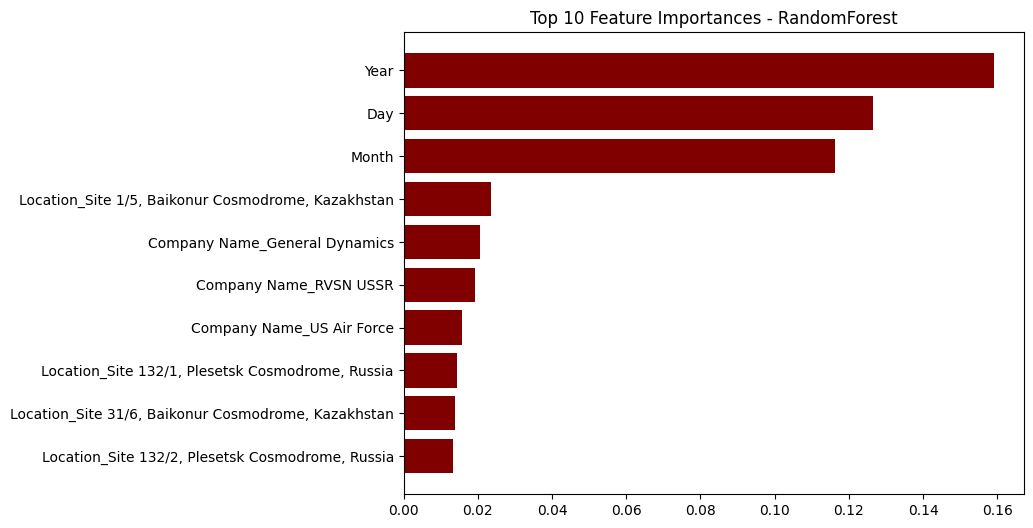

In [52]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center" , color = "#800000")
plt.yticks(range(len(indices)), [X_train_encoded.columns[i] for i in indices])
plt.title("Top 10 Feature Importances - RandomForest")
plt.show()


#📊**Visualizing Mission Status Distribution**  

In this step, we create a bar chart to visualize the distribution of mission outcomes:  

1. **Count mission outcomes**:  
   - `y.value_counts()` calculates the frequency of each mission status.  

2. **Plot the results**:  
   - Use `.plot(kind="bar")` to generate a bar chart.  
   - Apply custom colors:  
     - Green → Success  
     - Red → Failure  
     - Orange → Prelaunch Failure  

3. **Add labels and title**:  
   - Title: *"Distribution of Mission Status"*  
   - X-axis: *"Mission Status"*  
   - Y-axis: *"Count"*  

4. **Output**:  
   - A bar chart showing how many missions belong to each category (Success, Failure, Prelaunch Failure).  

> **Purpose of this cell:** Provide a clear visual overview of the mission status distribution in the dataset.  


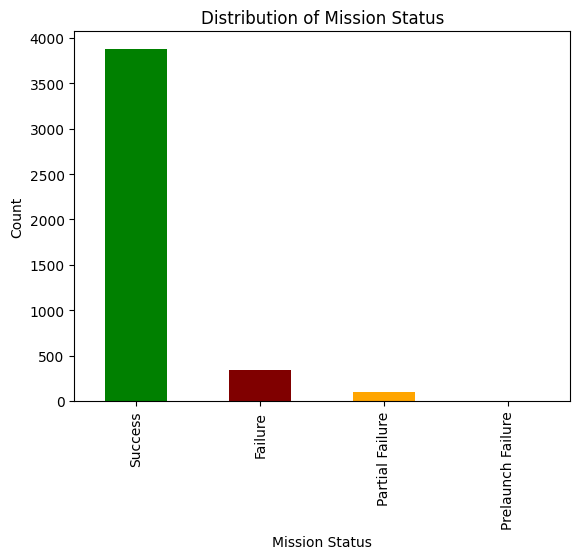

In [51]:
y.value_counts().plot(kind="bar", color=["#008000","#800000","#ffa500"])
plt.title("Distribution of Mission Status")
plt.xlabel("Mission Status")
plt.ylabel("Count")
plt.show()

#✅**Final Insights**  

- The dataset was successfully cleaned and prepared for modeling.  
- Feature engineering added useful time-based attributes (`Year`, `Month`, `Day`) which improved model understanding.  
- **Class imbalance** was effectively handled using SMOTE, ensuring fairer training.  
- Both **Random Forest** and **XGBoost** were applied and evaluated:  
  - Random Forest showed good accuracy with clear feature importance analysis.  
  - XGBoost achieved strong performance and provided detailed class-level metrics.  

#📊**Key Results:**
- Accuracy (Random Forest): ~89%  
- Accuracy (XGBoost): ~88%  
- Confusion matrices show that most classes were predicted correctly, with some misclassifications in minority classes.  

> **Conclusion:** Machine learning models can effectively classify rocket launch mission outcomes, and the techniques used (data cleaning, encoding, SMOTE, feature engineering) significantly improve performance. Future improvements may include hyperparameter tuning or trying deep learning models.  
